In [1]:
import numpy as np
import pandas as pd # for loading data

In [2]:
cd ..

/Users/Robin/Documents/Studium/Computer Science (Bachelor)/Year 3/Period 4/Machine Learning/Project/Machine-Learning


In [3]:
# Importing our own Functions
from util.helperfunctions import one_hot, one_hot_genres, clean_text, one_hot_reverse

[nltk_data] Downloading package wordnet to /Users/Robin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Robin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
cd src

/Users/Robin/Documents/Studium/Computer Science (Bachelor)/Year 3/Period 4/Machine Learning/Project/Machine-Learning/src


In [5]:
train_df = pd.read_csv("train.csv")

## Cleaning the test set lyrics and creating One-Hots for train data's genres and just cleaned lyrics

In [6]:
lyrics, word_list = clean_text(train_df['Lyrics'], 1)

# writing cleaned text back to df
index = 0
for text in lyrics:
    train_df['Lyrics'][index] = text
    index+=1
del lyrics

In [7]:
train_genres = one_hot_genres(train_df['Genre'])

## Replace all the lyrics with their respctive vector of word occurrences to be used as the input layer for the neural network

In [8]:
train_lyrics = np.zeros(shape=(len(train_df),len(word_list)))
for index, value in train_df.iterrows():
    train_lyrics[index] = one_hot(str(train_df['Lyrics'][index]), word_list, len(word_list), 0)
print(train_lyrics.shape)
lyrics_size = len(word_list)

# Cleaning no more used variables
del train_df

(10098, 34260)


## Preparing Validation Set

In [9]:
val_df = pd.read_csv("validation.csv")
lyrics, dummy_list = clean_text(val_df['Lyrics'], 0)

# writing cleaned text back to df
index = 0
for text in lyrics:
    val_df['Lyrics'][index] = text
    index+=1
del lyrics

In [10]:
val_genres = one_hot_genres(val_df['Genre'])

In [11]:
val_lyrics = np.zeros(shape=(len(val_df), lyrics_size))
for index, value in val_df.iterrows():
    val_lyrics[index] = one_hot(str(val_df['Lyrics'][index]), word_list, lyrics_size, 0)
print(val_lyrics.shape)

# Cleaning no more used variables
del val_df

(2142, 34260)


## Cleaning the test set lyrics and creating One-Hots for test data's genres and just cleaned lyrics

In [12]:
test_df = pd.read_csv("test.csv")
lyrics, dummy_list = clean_text(test_df['Lyrics'], 0)

# writing cleaned text back to df
index = 0
for text in lyrics:
    test_df['Lyrics'][index] = text
    index+=1
del lyrics

In [13]:
test_genres = one_hot_genres(test_df['Genre'])

In [14]:
test_lyrics = np.zeros(shape=(len(test_df), lyrics_size))
for index, value in test_df.iterrows():
    test_lyrics[index] = one_hot(str(test_df['Lyrics'][index]), word_list, lyrics_size, 0)
print(test_lyrics.shape)

# Cleaning no more used variables
del test_df

(2160, 34260)


# Neural Network stuff 
## **Modify and run only the cells below to change the neural network**

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(units=32, input_shape=(lyrics_size,)))
model.add(Activation('relu'))            # activation layer
model.add(Dropout(0.8))
#model.add(Dense(256))
model.add(Dense(8))
model.add(Activation('softmax'))         # output class probabilities

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                1096352   
_________________________________________________________________
activation_34 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 264       
_________________________________________________________________
activation_35 (Activation)   (None, 8)                 0         
Total params: 1,096,616
Trainable params: 1,096,616
Non-trainable params: 0
_________________________________________________________________


In [85]:
from tensorflow.keras.optimizers import SGD, Adam

optimizer = Adam(lr=0.0001) # lr is the learning rate
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(train_lyrics, train_genres, epochs=30, validation_data=(val_lyrics, val_genres), batch_size=16, shuffle=True);

Train on 10098 samples, validate on 2142 samples
Epoch 1/30
10098/10098 [==============================] - 10s 985us/sample - loss: 2.0135 - accuracy: 0.1920 - val_loss: 1.9180 - val_accuracy: 0.3067
Epoch 2/30
10098/10098 [==============================] - 6s 600us/sample - loss: 1.8971 - accuracy: 0.2666 - val_loss: 1.8232 - val_accuracy: 0.4206
Epoch 3/30
10098/10098 [==============================] - 5s 537us/sample - loss: 1.8265 - accuracy: 0.3081 - val_loss: 1.7602 - val_accuracy: 0.4514
Epoch 4/30
10098/10098 [==============================] - 5s 541us/sample - loss: 1.7531 - accuracy: 0.3387 - val_loss: 1.7057 - val_accuracy: 0.4729
Epoch 5/30
10098/10098 [==============================] - 6s 643us/sample - loss: 1.7043 - accuracy: 0.3621 - val_loss: 1.6632 - val_accuracy: 0.4827
Epoch 6/30
10098/10098 [==============================] - 6s 634us/sample - loss: 1.6537 - accuracy: 0.3872 - val_loss: 1.6202 - val_accuracy: 0.4944
Epoch 7/30
10098/10098 [==========================

## Testing the Neural Network's performace + Confusion Matrix

In [87]:
results = model.evaluate(test_lyrics, test_genres, batch_size=16)

2160/2160 [==============================] - 1s 620us/sample - loss: 1.3106 - accuracy: 0.5542


In [88]:
from sklearn.metrics import confusion_matrix

y_pred=model.predict_classes(test_lyrics)
cm=confusion_matrix(one_hot_reverse(test_genres),y_pred)
print(cm)

[[106  42  10  30  34  21  21  22]
 [ 28  89   0  18  16  57  18  35]
 [  3   1 258   0  23   0   6   0]
 [  9  15   0 168   9   6  11  38]
 [ 13  11  33  12 157  10  28  10]
 [  9  22   4   3   7 159  13  22]
 [ 19  27  25  20  42  29 104  19]
 [ 17  28   0  27   2  15  23 156]]


                   Pop  Rock  Hip-Hop/Rap  Country  R&B/Soul  Metal  \
Pop                106    42           10       30        34     21   
Rock                28    89            0       18        16     57   
Hip-Hop/Rap          3     1          258        0        23      0   
Country              9    15            0      168         9      6   
R&B/Soul            13    11           33       12       157     10   
Metal                9    22            4        3         7    159   
Alternative/Indie   19    27           25       20        42     29   
Folk                17    28            0       27         2     15   

                   Alternative/Indie  Folk  
Pop                               21    22  
Rock                              18    35  
Hip-Hop/Rap                        6     0  
Country                           11    38  
R&B/Soul                          28    10  
Metal                             13    22  
Alternative/Indie                104    19  


(8.0, 0.0)

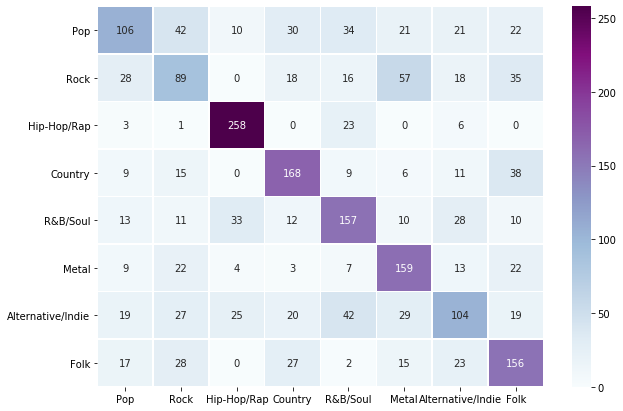

In [89]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

genre_list = ['Pop','Rock', 'Hip-Hop/Rap', 'Country', 'R&B/Soul', 'Metal', 'Alternative/Indie', 'Folk']

df_cm = pd.DataFrame(cm, index = genre_list, columns = genre_list)
print(df_cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, linewidth=0.5, fmt='g', cmap="BuPu")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values